# Лабораторная работа №6 Сетевые алгоритмы. Динамические алгоритмы поиска путей.
## Выполнила студентка группы БСТ2002 Тулаева Диана Павловна

### Задание:

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.


In [176]:
from heapq import *
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import time

def graph_rewriting(matrix):   # Заносит матрицу из файла в словарь 
    for i in range(len(matrix)):
        mas2 = []
        for j in range(len(matrix)):
            if matrix[i][j] > 0:
                mas =[]
                mas.append(matrix[i][j])
                mas.append(j )
                mas2.append(mas)
                graph[i ] = mas2
    return graph

def dijkstra(start, goal, graph):  # Находит следующую вершину
    queue = []
    heappush(queue, (0, start))
    cost_visited = {start: 0}
    visited = {start: None}

    while queue:
        cur_cost, cur_node = heappop(queue)
        if cur_node == goal:
            break

        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[cur_node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = cur_node
    return visited

def short_cut(start, goal): # Список c вершинами кратчайшего пути
    path = []     
    cur_node = goal
    while cur_node != start:
        fff = dijkstra(start, goal, graph)
        path.append(cur_node)
        cur_node = fff[cur_node]
    path.append(start)
    path.reverse()
    return path

def get_link(v, matrix): # перебирает все связанные с вершиной v вершины 
    for i, weight in enumerate(matrix[v]):
        if weight > 0:
            yield i

def arg_min(T, S):  # выбирает следующий узел с наименьшим весом
    amin = -1
    m = max(T)  # максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i

    return amin

def  len_short_path(start,matrix): #все кратчайшие пути по всем возможнвм направлениям
    T = [math.inf]*len(matrix)   # последняя строка таблицы
    v = start 
    S = {v}     # просмотренные вершины
    T[v] = 0    # нулевой вес для стартовой вершины

    while v != -1:          # цикл, пока не просмотрим все вершины
        for j in get_link(v, matrix):   # перебираем все связанные вершины с вершиной v
            if j not in S:           # если вершина еще не просмотрена
                w = T[v] + matrix[v][j]
                if w < T[j]:
                    T[j] = w      # связываем вершину j с вершиной v
        v = arg_min(T, S)            # выбираем следующий узел с наименьшим весом
        if v != (start ):                    # выбрана очередная вершина
            S.add(v)                 # добавляем новую вершину в рассмотрение
    if T[goal ] == math.inf:
        T[goal ] = 0
    return T

def proverka(start, goal, paths, matrix):   
    L, x = 0, 0      # l Длинна пути
    root_path = []

    for i in range(1, len(paths) - 1):
        root_path.append(paths[i-1]) # Корневой путь
        for j in root_path:  
            if j in paths:            # Проверяет есть ли в наикратчайшем пути корневой путь
                x = 1
            else:
                x = -1
        if x == 1:
            save = matrix[paths[i-1] ][paths[i] ]  # Сохраняем ребро
            matrix[paths[i-1] ][paths[i] ] = 0     # Удаляем ребро, чтобы можно было вычислить ответвление
        path_k2 = graph_rewriting(matrix)
        super_path = dijkstra(start, goal, path_k2)  # Новый путь
        sh_cut2 = short_cut(start, goal)
        L = len_short_path(start, matrix)            # Новая длинна пути 
        matrix[paths[i-1] ][paths[i] ] = save
        if L[goal ] == math.inf:
            L[goal ] = 0
        if (L[goal ] not in candidates_lenght) and (L[goal ] not in lenghts):
            candidates_lenght.append(L[goal ])
            candidates.append(sh_cut2)  
    return (candidates_lenght, candidates)


def k_shorts(start, goal, matrix):
    candidates,candidates_lenght = [], []
    for k in range(count - 1) :
        candidates_lenght, candidates = proverka(start, goal, paths[k], matrix)
        t = math.inf
        g = 0
        for i in range(len(candidates_lenght)):
            if candidates_lenght[i] < t:
                t = candidates_lenght[i]
                g = i
        paths.append(candidates[g])
        lenghts.append(candidates_lenght[g])
        del candidates[g]
        del candidates_lenght[g]
    return (lenghts, paths)

file = open('matrix.txt')
matrix = [list(map(int, row.split())) for row in file.readlines()] # Читаем матрицу из файла и записываем 

print('Введите первую вершину:')
start = int(input()) 
print('Введите вторую вершину:')
goal = int(input())
print('Введите количество наименьших путей:')
count = int(input())


graph = {}                                                 
visited = dijkstra(start, goal, graph_rewriting(matrix))   #graph_rewriting(matrix) Словарь с дорогами
sh_cut = short_cut(start, goal)
print('\nКратчайший путь:')
print(sh_cut)


T = len_short_path(start,matrix) 
print('Динна кртчайшего пути равна:')
print(T[goal])


paths,lenghts = [], []
paths.append(sh_cut)
lenghts.append(T[goal ])

lenghts, paths = k_shorts(start, goal, matrix)
for i in range(len(lenghts)):
    print('k =', i + 1, 'Путь:',paths[i],'  Длинна пути:',lenghts[i])


Введите первую вершину:
0
Введите вторую вершину:
7
Введите количество наименьших путей:
4

Кратчайший путь:
[0, 1, 5, 8, 7]
Динна кртчайшего пути равна:
11
k = 1 Путь: [0, 1, 5, 8, 7]   Длинна пути: 11
k = 2 Путь: [0, 1, 5, 7]   Длинна пути: 12
k = 3 Путь: [0, 1, 3, 5, 8, 7]   Длинна пути: 15
k = 4 Путь: [0, 3, 5, 8, 7]   Длинна пути: 18


In [170]:
def all_nodes(matrix):           # Записывает все вершины в список
    nodes = []
    for i in range(len(matrix[0])):
        nodes.append(i)
    return nodes

def all_edges(matrix):           # Записывает все рёбра в список с кортежами (первая вершина, вторая, вес)
    edges = []
    for i in range(len(matrix[0])):
        for j in range(len(matrix[0])):
            if matrix[i][j] != 0:
                edges.append((i , j , matrix[i][j]))
    return edges  

def get_nodes_edges(pass_nodes):  # Записывает кратчайший путь в список с кортеждами 
    edges = []
    v = pass_nodes[0]
    for i in range(1, len(pass_nodes)):
        u = pass_nodes[i]
        edges.append((v, u))
        v = u
    return edges

def draw(DG, color_nodes, color_edges):
    edges = list(DG.edges) 
    num_nodes = DG.number_of_nodes() 
    num_edges = DG.number_of_edges() 
    node_color = ['b'] * num_nodes
    edge_color = ['b'] * num_edges 


    for i in color_nodes:
        node_color[i] = 'r'

    for i in range(num_edges):
        u, v = edges[i][0], edges[i][1]
        if (u, v) in set(color_edges):
            edge_color[i] = 'r'
            
    pos = nx.circular_layout(DG)
    plt.title('Digraph: Shortest Path')
    nx.draw(DG, pos, with_labels=True, node_color=node_color, edge_color=edge_color) 
    edge_labels = nx.get_edge_attributes(DG, 'weight')
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels) 
    plt.savefig('dijkstra.png', format='PNG')
    plt.show()


Кратчайший путь:
[0, 1, 5, 8, 7]


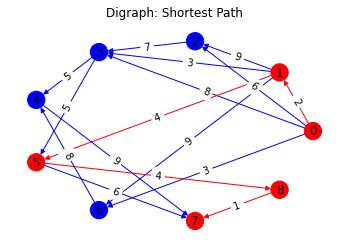

In [173]:
nodes = all_nodes(matrix)
edges = all_edges(matrix)

for i in range (len(sh_cut)):
    sh_cut[i] = sh_cut[i] 
pass_nodes = sh_cut
print('\nКратчайший путь:')
print(pass_nodes)
pass_edges = get_nodes_edges(pass_nodes)
DG = nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(edges)
draw(DG, pass_nodes, pass_edges)